## WEEK 1

In [45]:
pip install seaborn scikit-learn 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv('air quality data.csv')

In [48]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [49]:
df.shape

(29531, 16)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [51]:
df.duplicated().sum()

np.int64(0)

In [52]:
# DROP THE ROW THAT HAS MISSING VALUE
df.dropna(subset='AQI',inplace= True)

In [53]:
# TO CHECK MISSING VALUE
df.isnull().sum().sort_values(ascending=False)

Xylene        15372
PM10           7086
NH3            6536
Toluene        5826
Benzene        3535
NOx            1857
O3              807
PM2.5           678
SO2             605
CO              445
NO2             391
NO              387
Date              0
City              0
AQI               0
AQI_Bucket        0
dtype: int64

In [54]:
df.shape

(24850, 16)

In [55]:
# STATISTICS
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24172.000000,17764.000000,24463.000000,24459.000000,22993.000000,18314.000000,24405.000000,24245.000000,24043.000000,21315.000000,19024.000000,9478.000000,24850.000000
mean,67.476613,118.454435,17.622421,28.978391,32.289012,23.848366,2.345267,14.362933,34.912885,3.458668,9.525714,3.588683,166.463581
std,63.075398,89.487976,22.421138,24.627054,30.712855,25.875981,7.075208,17.428693,21.724525,16.036020,20.881085,6.754324,140.696585
min,0.040000,0.030000,0.030000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,29.000000,56.777500,5.660000,11.940000,13.110000,8.960000,0.590000,5.730000,19.250000,0.230000,1.027500,0.390000,81.000000
50%,48.785000,96.180000,9.910000,22.100000,23.680000,16.310000,0.930000,9.220000,31.250000,1.290000,3.575000,1.420000,118.000000
75%,80.925000,150.182500,20.030000,38.240000,40.170000,30.360000,1.480000,15.140000,46.080000,3.340000,10.180000,4.120000,208.000000
max,914.940000,917.080000,390.680000,362.210000,378.240000,352.890000,175.810000,186.080000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [56]:
# PERCENTAGE OF NULLL VALUES 
a = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
a

Xylene        61.859155
PM10          28.515091
NH3           26.301811
Toluene       23.444668
Benzene       14.225352
NOx            7.472837
O3             3.247485
PM2.5          2.728370
SO2            2.434608
CO             1.790744
NO2            1.573441
NO             1.557344
Date           0.000000
City           0.000000
AQI            0.000000
AQI_Bucket     0.000000
dtype: float64

---- Xylene has highest percentage of missing values ----

## WEEK 2 - VISUALIZATION

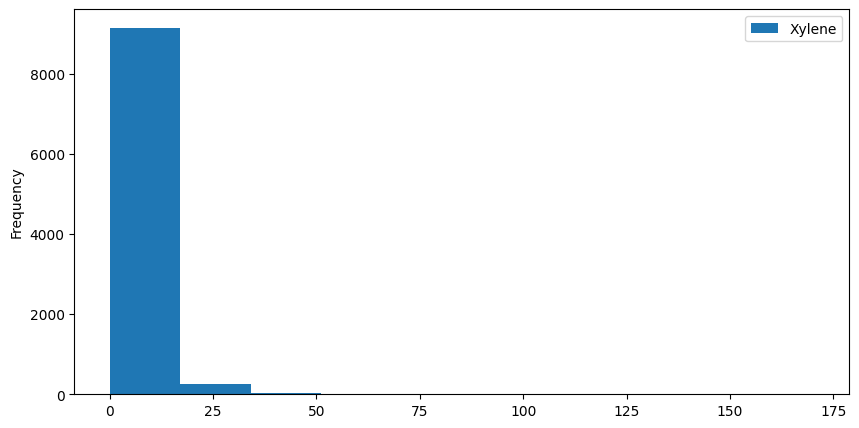

In [57]:
# univarient analysis
df['Xylene'].plot(kind= 'hist' , figsize=(10,5))
plt.legend()
plt.show()

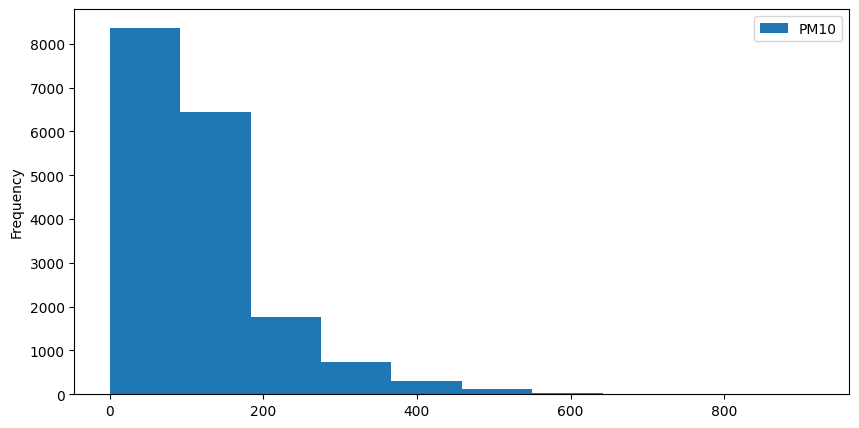

In [58]:
df['PM10'].plot(kind= 'hist' , figsize=(10,5))
plt.legend()
plt.show()

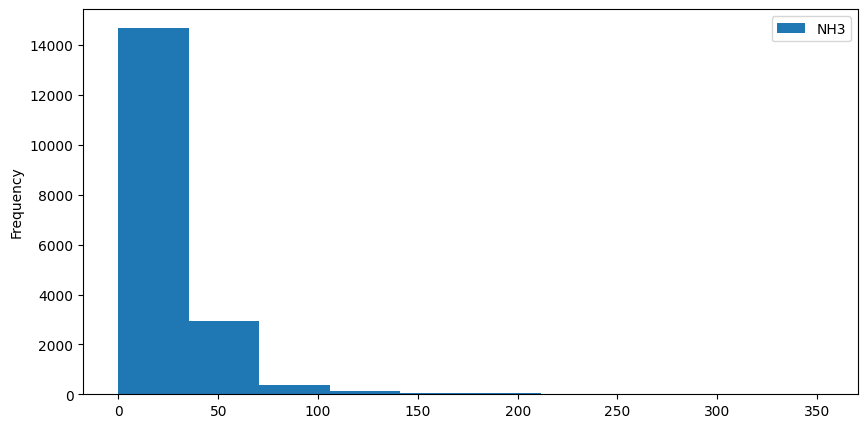

In [59]:
df['NH3'].plot(kind= 'hist' , figsize=(10,5))
plt.legend()
plt.show()

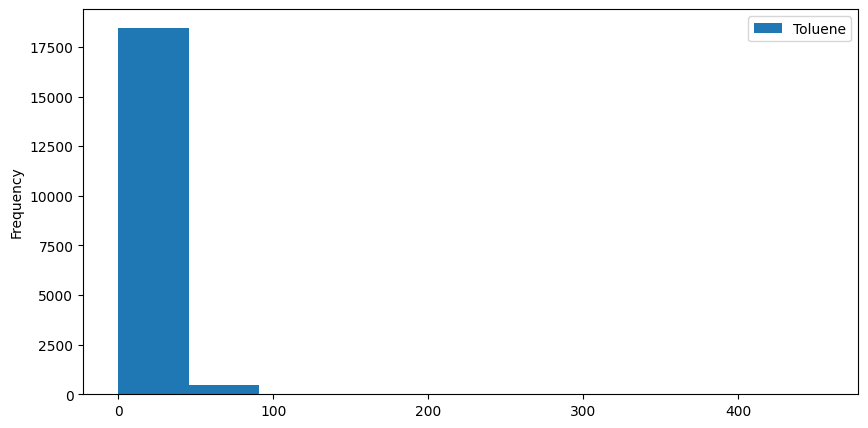

In [60]:
df['Toluene'].plot(kind= 'hist' , figsize=(10,5))
plt.legend()
plt.show()

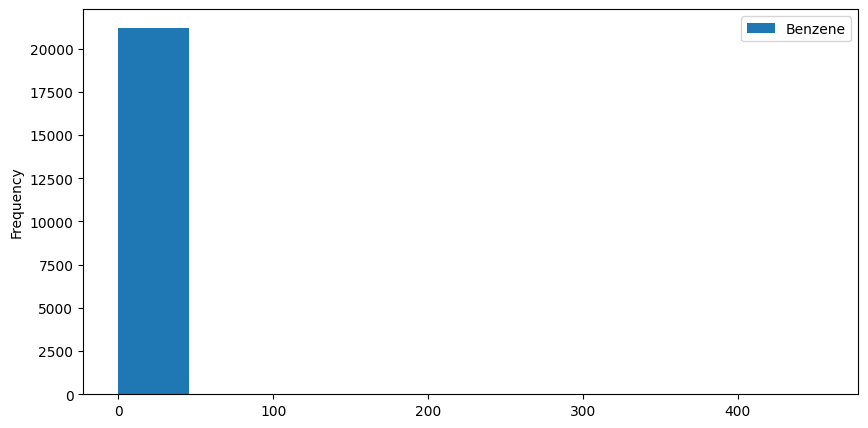

In [61]:
df['Benzene'].plot(kind= 'hist' , figsize=(10,5))
plt.legend()
plt.show()

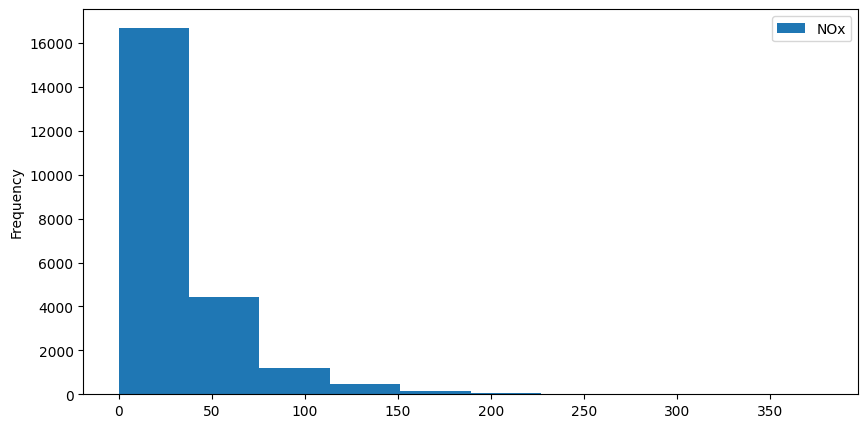

In [62]:
df['NOx'].plot(kind= 'hist' , figsize=(10,5))
plt.legend()
plt.show()

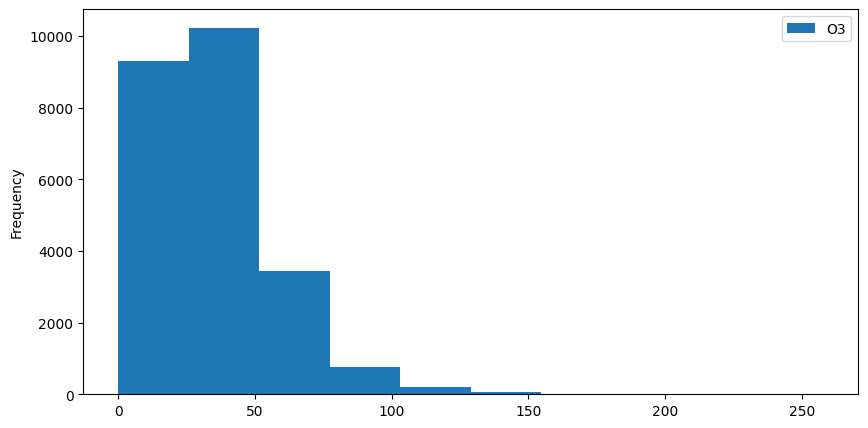

In [63]:
df['O3'].plot(kind= 'hist' , figsize=(10,5))
plt.legend()
plt.show()

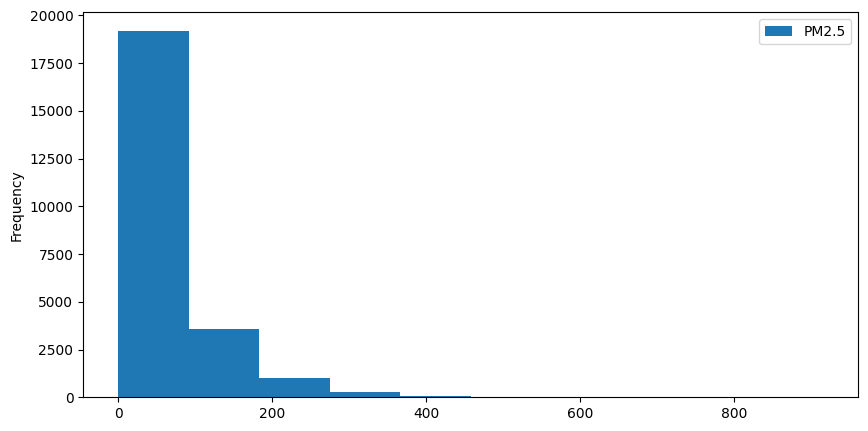

In [64]:
df['PM2.5'].plot(kind= 'hist' , figsize=(10,5))
plt.legend()
plt.show()

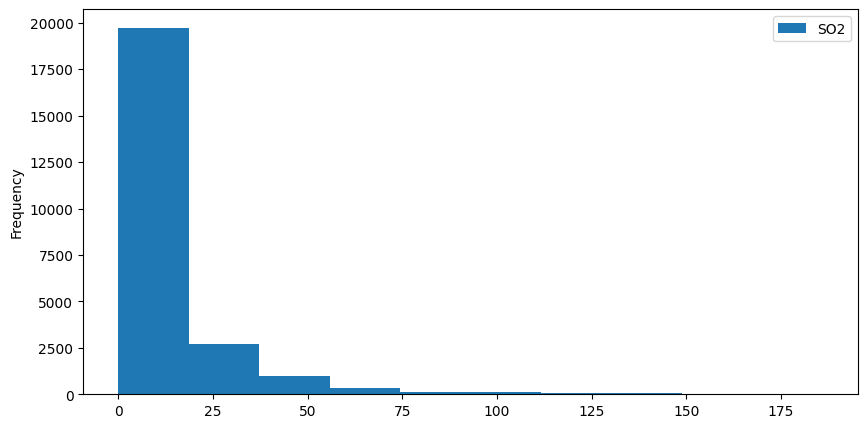

In [65]:
df['SO2'].plot(kind= 'hist' , figsize=(10,5))
plt.legend()
plt.show()

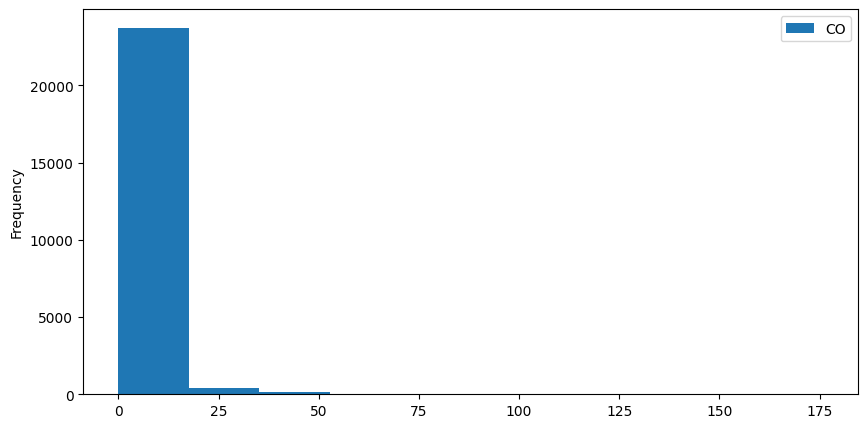

In [66]:
df['CO'].plot(kind= 'hist' , figsize=(10,5))
plt.legend()
plt.show()

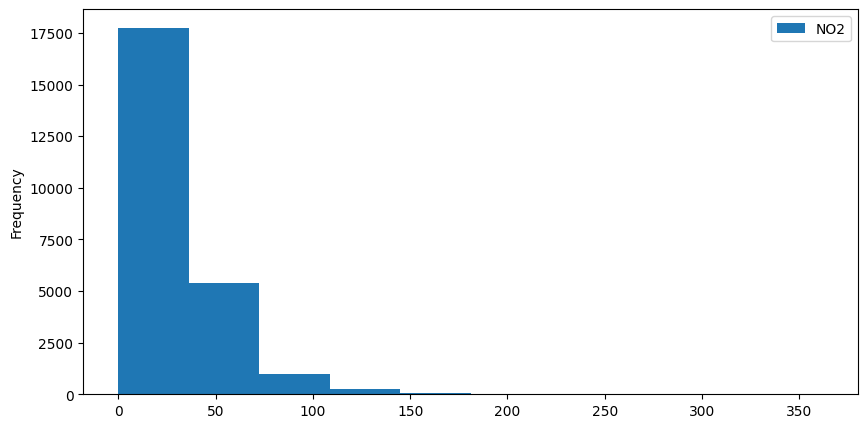

In [67]:
df['NO2'].plot(kind= 'hist' , figsize=(10,5))
plt.legend()
plt.show()

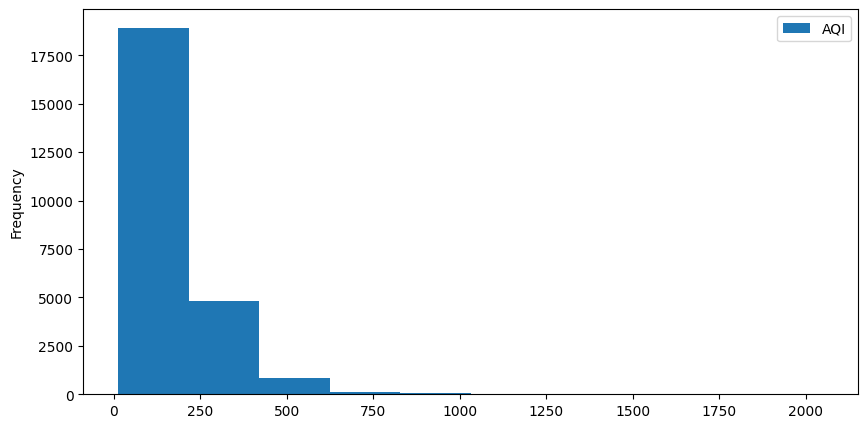

In [68]:
df['AQI'].plot(kind= 'hist' , figsize=(10,5))
plt.legend()
plt.show()

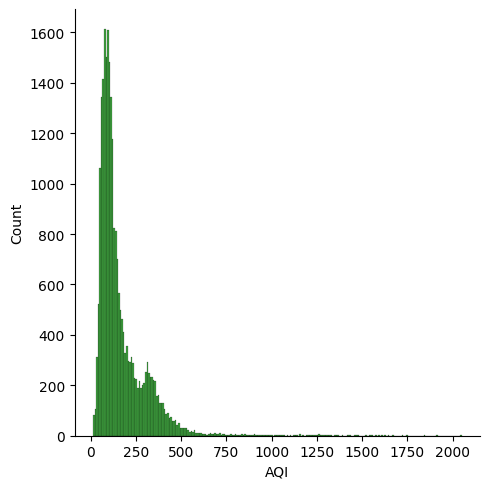

In [73]:
# Distribution of Aqi
sns.displot(df,x='AQI',color='green')
plt.show()

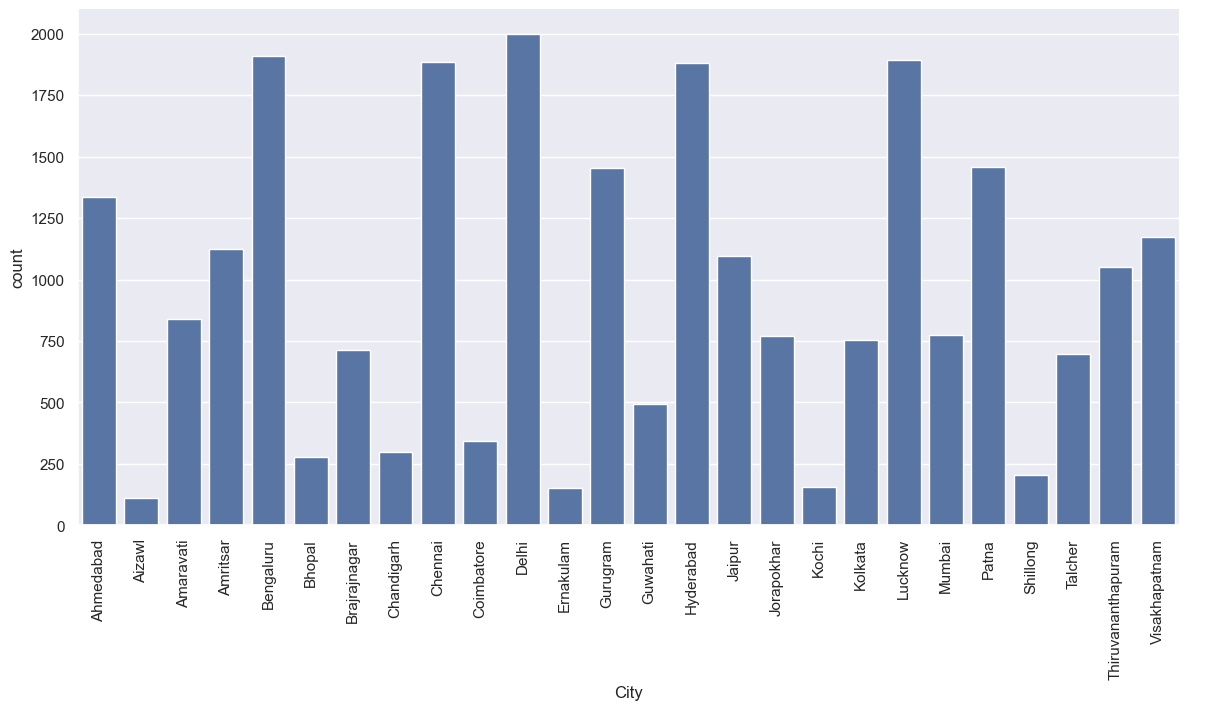

In [78]:
# Bivariate 
sns.set_theme(style='darkgrid')
g = sns.catplot(x='City', kind='count', data=df,height=6,aspect=2)
g.set_xticklabels(rotation=90)

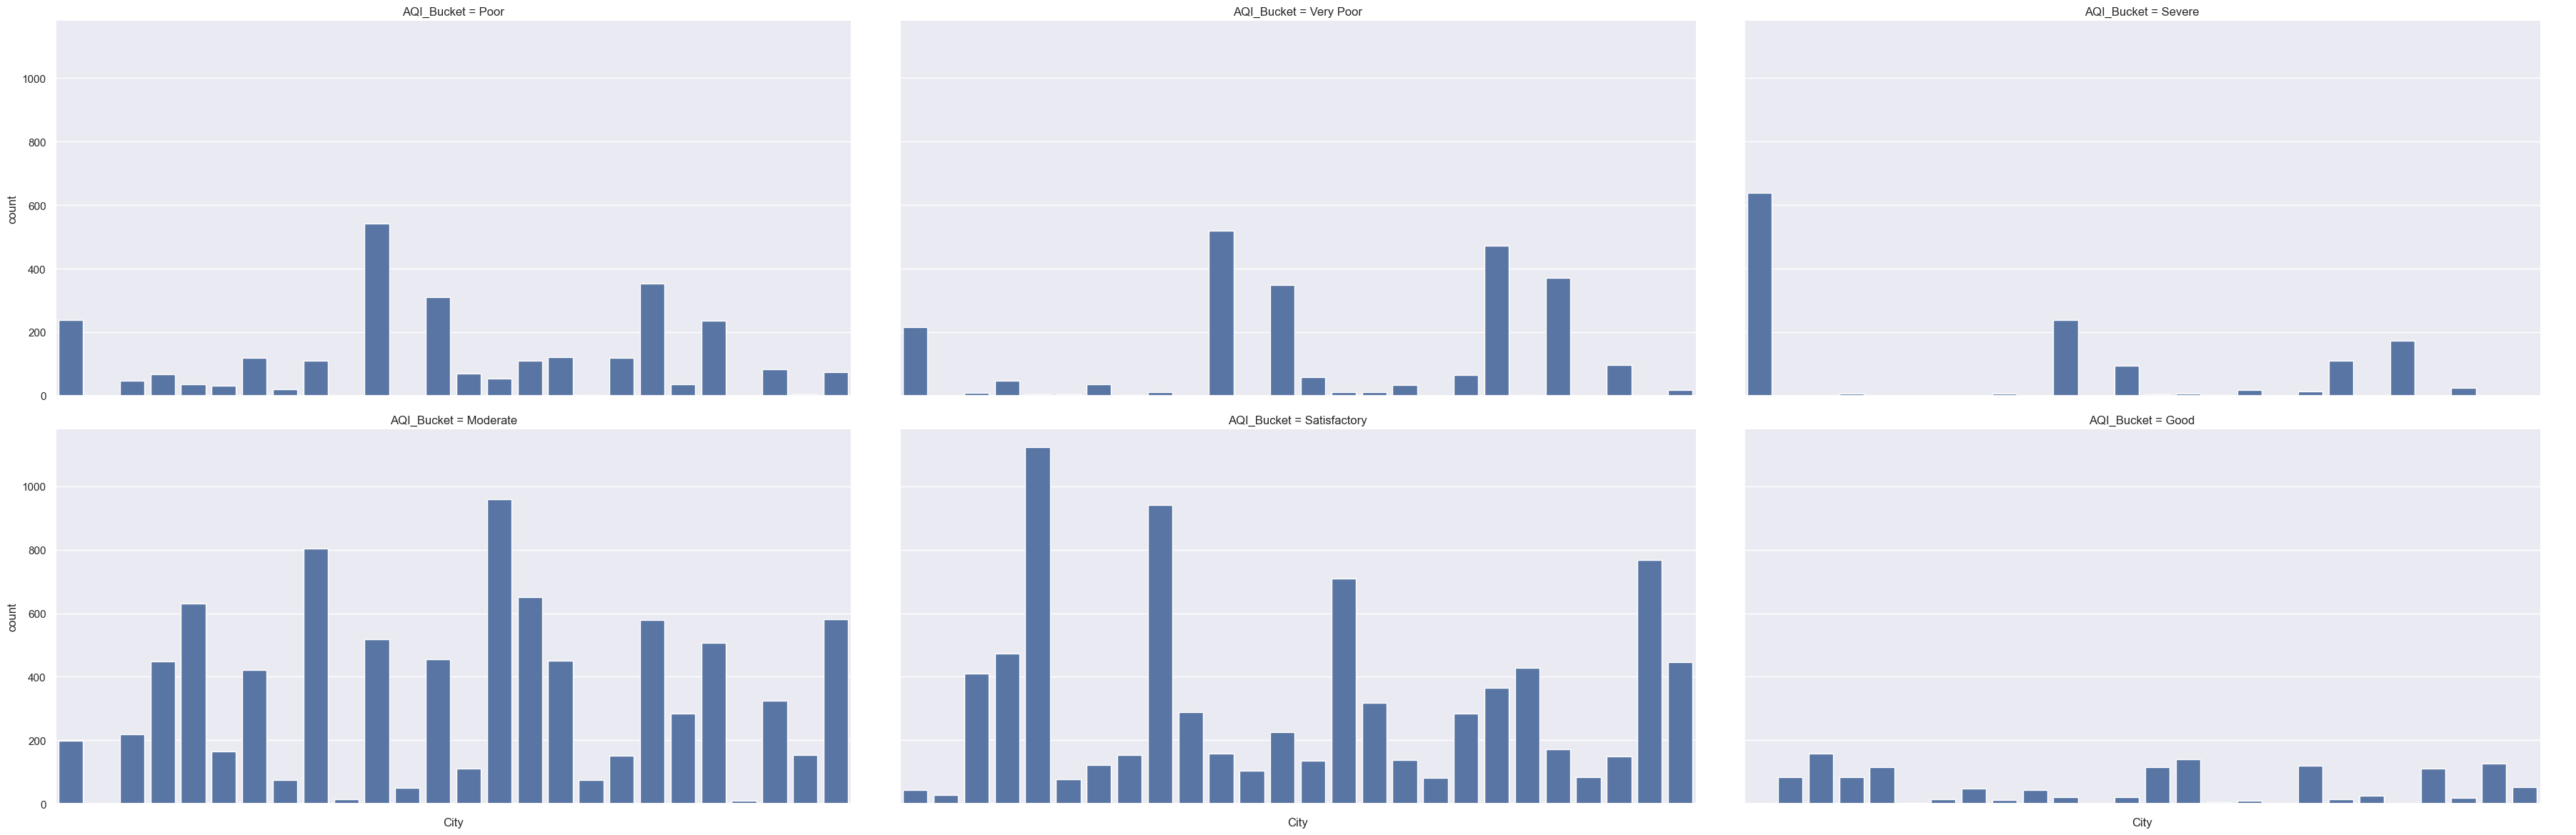

In [79]:
sns.set_theme(style='darkgrid')
gg = sns.catplot(x='City', kind='count', col="AQI_Bucket", col_wrap=3, data=df,height=6,aspect=2)
gg.set_xticklabels(rotation=90)

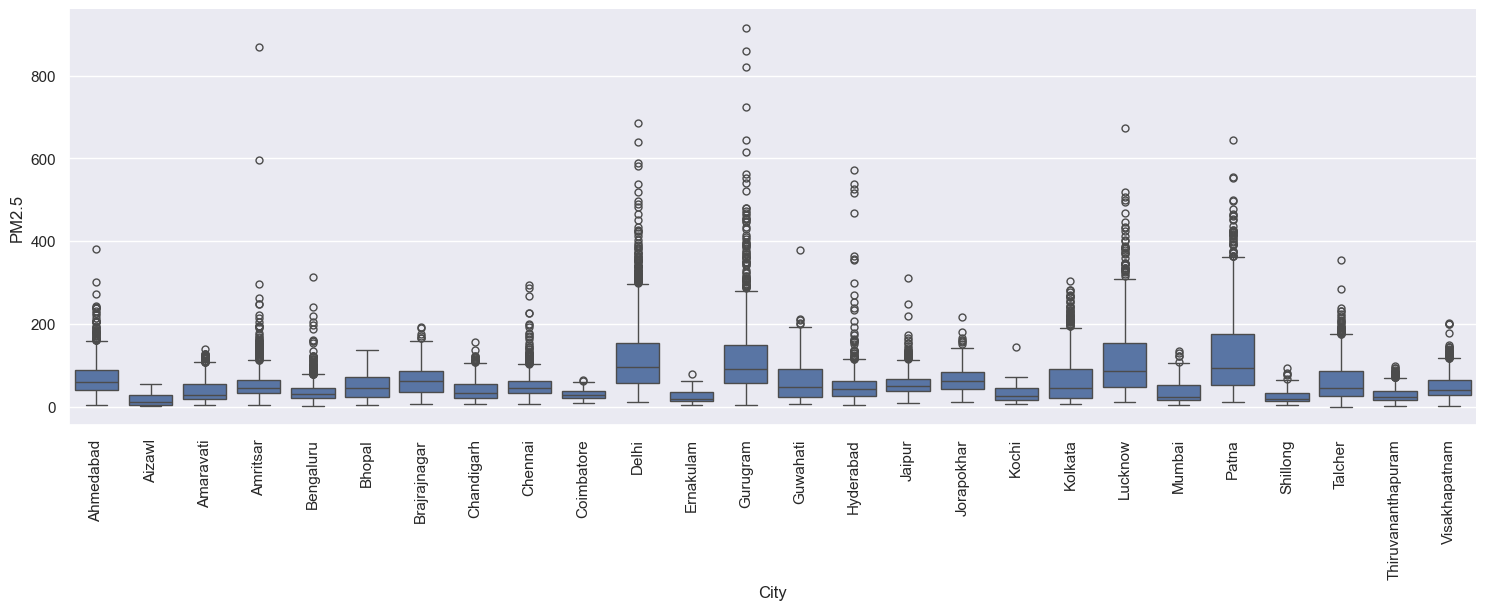

In [80]:
g1 = sns.catplot(x='City', y='PM2.5', kind='box', data=df, height=5, aspect=3)
g1.set_xticklabels(rotation=90)

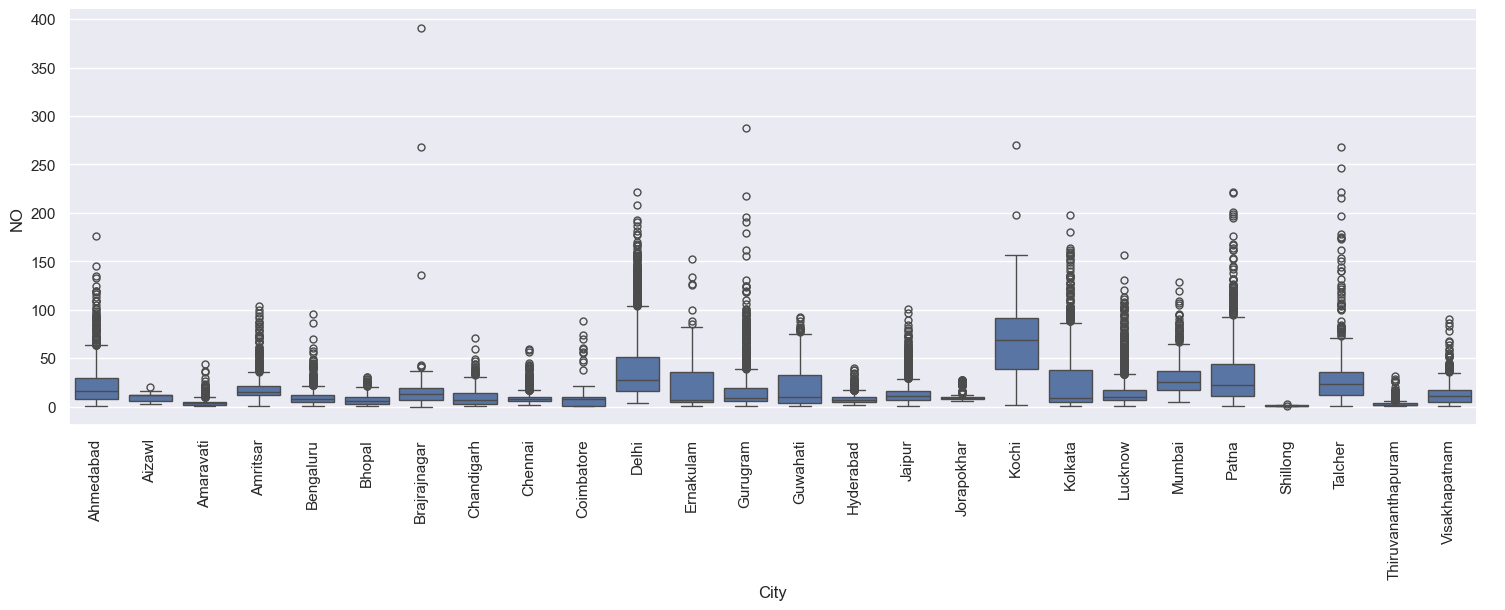

In [88]:
g2 = sns.catplot(x='City', y='NO', kind='box', data=df, height=5, aspect=3)
g2.set_xticklabels(rotation=90)

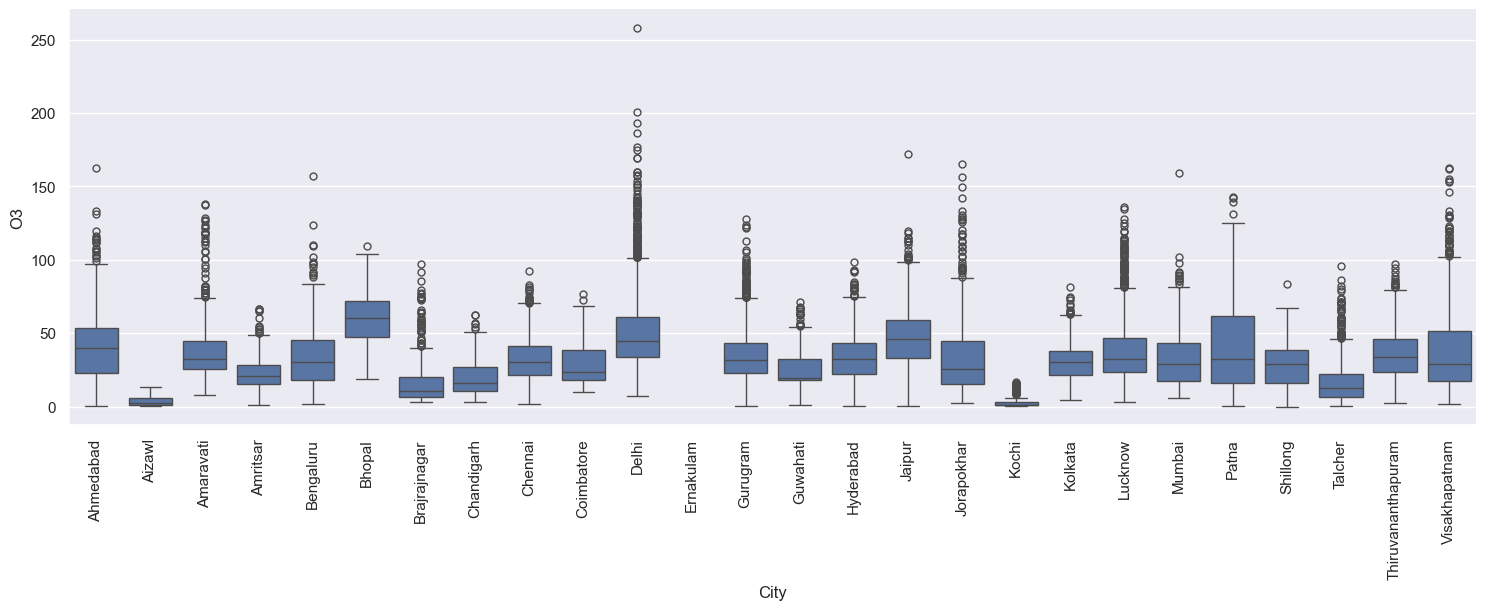

In [82]:
g3 = sns.catplot(x='City', y='O3', kind='box', data=df, height=5, aspect=3)
g3.set_xticklabels(rotation=90)

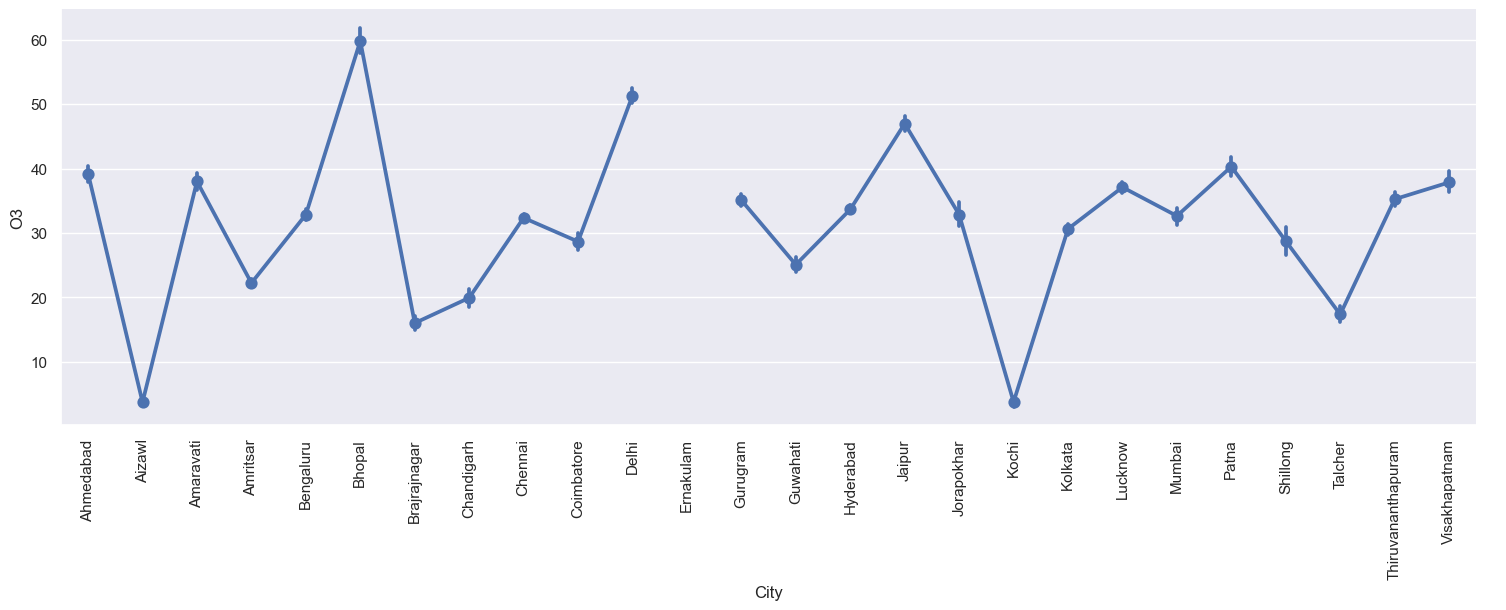

In [86]:
g4 = sns.catplot(x='City', y='O3', kind='point', data=df, height=5, aspect=3)
g4.set_xticklabels(rotation=90)

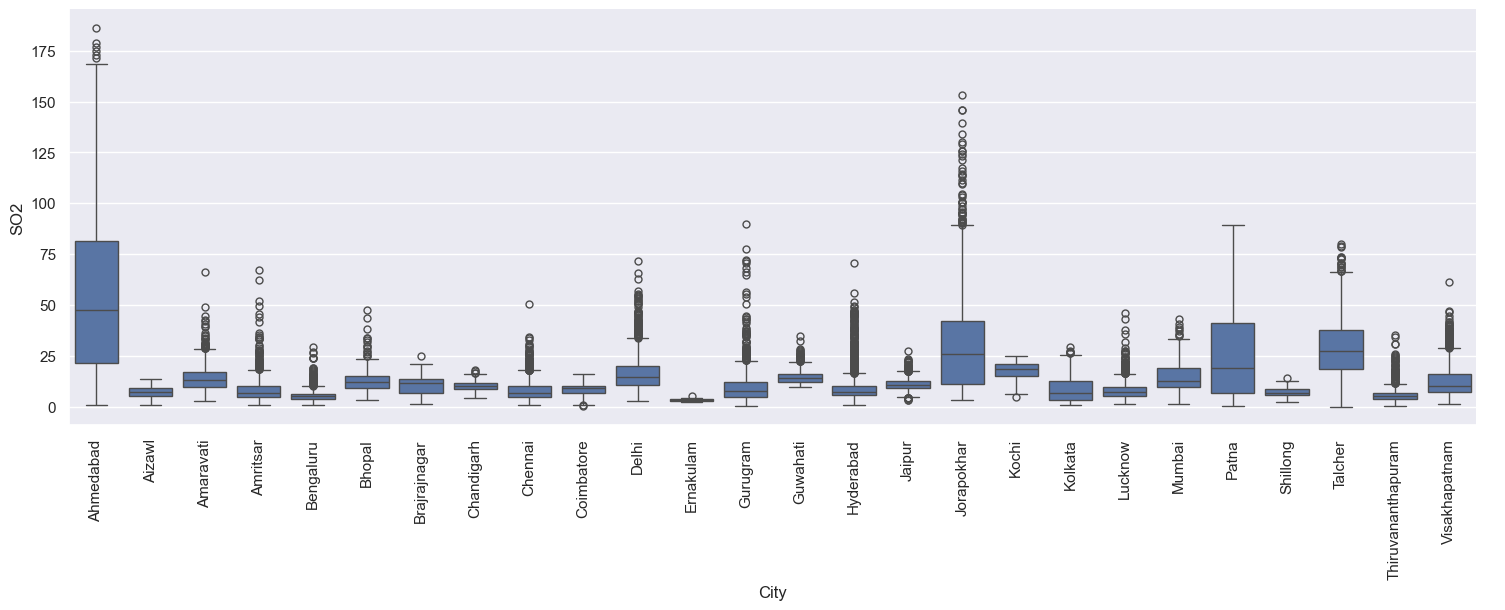

In [89]:
g5 = sns.catplot(x='City', y='SO2', kind='box', data=df, height=5, aspect=3)
g5.set_xticklabels(rotation=90)

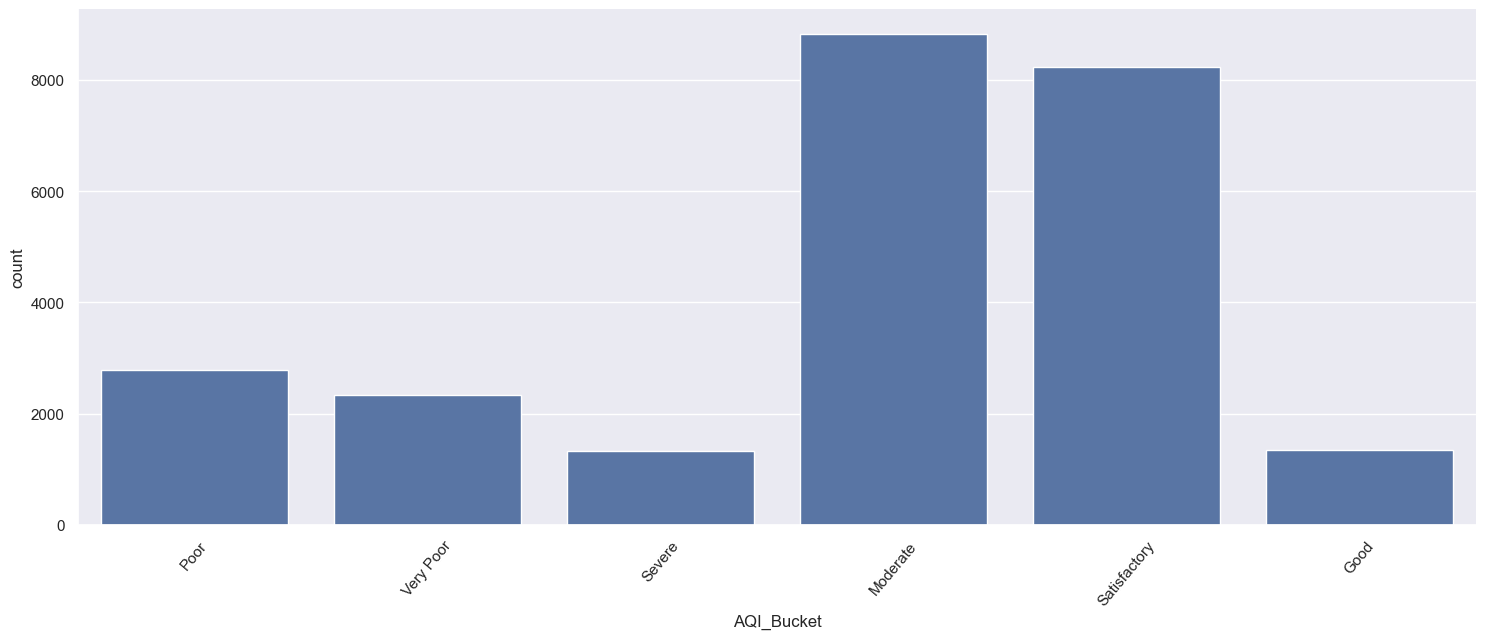

In [97]:
g6 = sns.catplot(data=df, x='AQI_Bucket', height=6, aspect=2.5, kind='count')
g6.set_xticklabels(rotation=50)

In [98]:
# To check null values
df.isnull().sum().sort_values(ascending=False)

Xylene        15372
PM10           7086
NH3            6536
Toluene        5826
Benzene        3535
NOx            1857
O3              807
PM2.5           678
SO2             605
CO              445
NO2             391
NO              387
Date              0
City              0
AQI               0
AQI_Bucket        0
dtype: int64

In [103]:
df.describe().loc['mean']

PM2.5       67.476613
PM10       118.454435
NO          17.622421
NO2         28.978391
NOx         32.289012
NH3         23.848366
CO           2.345267
SO2         14.362933
O3          34.912885
Benzene      3.458668
Toluene      9.525714
Xylene       3.588683
AQI        166.463581
Name: mean, dtype: float64

In [107]:
# To fill missing number in column
df=df.replace({
    "PM2.5":{np.nan:67.476613},
    "PM10":{np.nan:118.454435},
    "NO":{np.nan:17.622421},
    "NO2":{np.nan:28.978391},
    "NOx":{np.nan:32.289012},
    "NH3":{np.nan:23.848366},
    "CO":{np.nan:2.345267},
    "SO2":{np.nan:14.362933},
    "O3":{np.nan:34.912885},
    "Benzene":{np.nan:3.458668},
    "Xylene":{np.nan:3.588683},
    "Toluene":{np.nan:9.525714},
    "AQI":{np.nan:166.463581}
})

In [108]:
df.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [110]:
df = df.drop(['AQI_Bucket'], axis=1)

In [111]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,Ahmedabad,2015-01-29,83.13,118.454435,6.93,28.71,33.72,23.848366,6.93,49.52,59.76,0.02,0.00,3.14,209.0
29,Ahmedabad,2015-01-30,79.84,118.454435,13.85,28.68,41.08,23.848366,13.85,48.49,97.07,0.04,0.00,4.81,328.0
30,Ahmedabad,2015-01-31,94.52,118.454435,24.39,32.66,52.61,23.848366,24.39,67.39,111.33,0.24,0.01,7.67,514.0
31,Ahmedabad,2015-02-01,135.99,118.454435,43.48,42.08,84.57,23.848366,43.48,75.23,102.70,0.40,0.04,25.87,782.0
32,Ahmedabad,2015-02-02,178.33,118.454435,54.56,35.31,72.80,23.848366,54.56,55.04,107.38,0.46,0.06,35.61,914.0


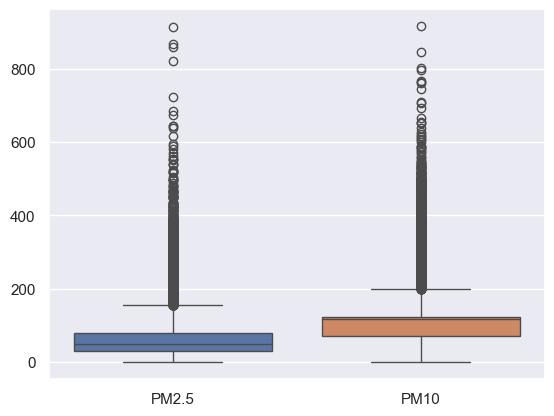

In [113]:
# To find oulier (An outlier is a data point that is significantly different from other observations in 
# a dataset. It deviates from the expected pattern, either being too high or too low compared to most values.)

sns.boxplot(data=df[['PM2.5','PM10']])
plt.show()

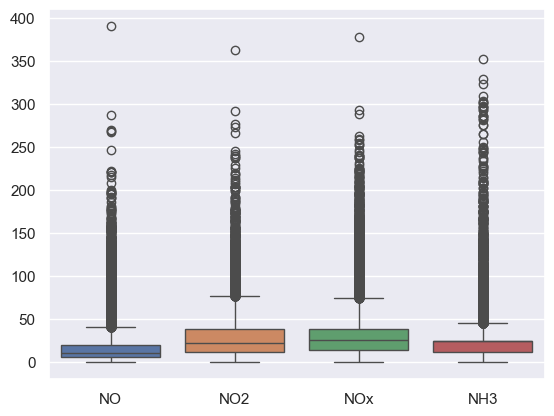

In [116]:
sns.boxplot(data=df[['NO','NO2','NOx','NH3']])
plt.show()

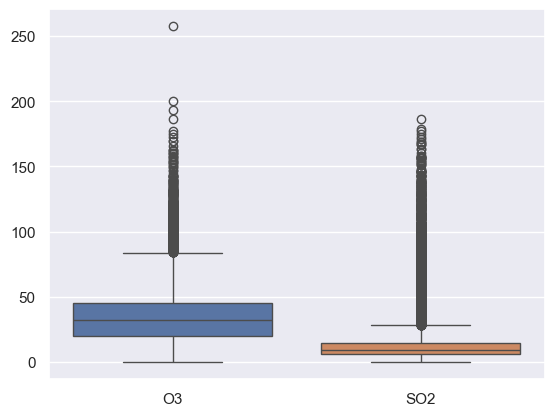

In [117]:
sns.boxplot(data=df[['O3','SO2']])
plt.show()

In [124]:
# IQR Method - Q3 - Q1 
def replace_outliers(df): 
    for column in df.select_dtypes(include=['number']).columns: 
        Q1 = df[column].quantile(0.25) 
        Q3 = df[column].quantile(0.75) 
        IQR = Q3 - Q1 
        lb = Q1 - 1.5 * IQR 
        ub = Q3 + 1.5 * IQR 
        df[column] = df[column].apply( 
            lambda x: Q1 if x < lb else (Q3 if x> ub else x) ) 
    return df

In [125]:
df = replace_outliers(df)

In [126]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24850.0,55.174281,31.829575,0.04,29.56,50.165000,79.505625,154.30
PM10,24850.0,101.351323,39.079916,0.03,71.78,118.454435,122.955625,199.70
NO,24850.0,12.507694,8.762015,0.03,5.72,10.075000,19.710000,40.68
NO2,24850.0,25.901114,16.669494,0.01,12.09,22.535000,37.910000,76.62
NOx,24850.0,26.574513,16.138682,0.00,14.03,25.720000,38.170000,74.38
NH3,24850.0,19.486584,9.630370,0.01,11.28,23.848366,24.710000,44.85
CO,24850.0,1.040507,0.615436,0.00,0.59,0.950000,1.530000,2.94
SO2,24850.0,10.334743,5.680901,0.01,5.79,9.430000,14.890000,28.52
O3,24850.0,33.177781,17.487724,0.01,19.64,32.060000,45.395625,83.99
Benzene,24850.0,2.098520,1.828135,0.00,0.34,1.810000,3.458668,8.13


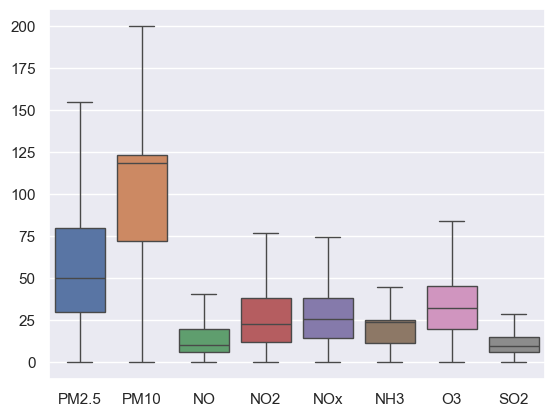

In [131]:
# After removing outliers 
sns.boxplot(data=df[['PM2.5','PM10','NO','NO2','NOx','NH3','O3','SO2']])
plt.show()

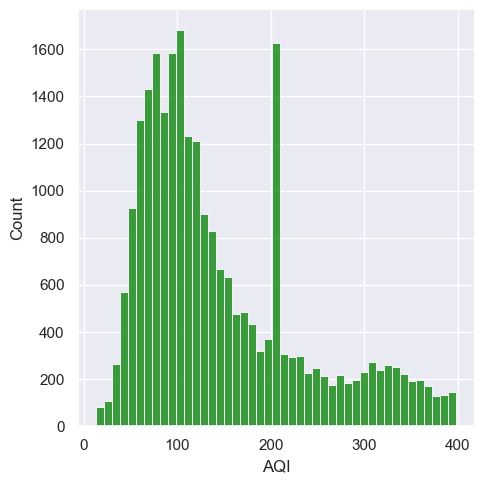

In [132]:
sns.displot(df,x='AQI',color='green')
plt.show()

In [147]:
df1 = df.drop(columns=['City'])
print(df1.columns)

Index(['Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')


In [149]:
df1['Date'] = pd.to_datetime(df1['Date'])  # Convert to datetime
df1['Date'] = df1['Date'].map(pd.Timestamp.toordinal)  # Convert to numerical ordinal format


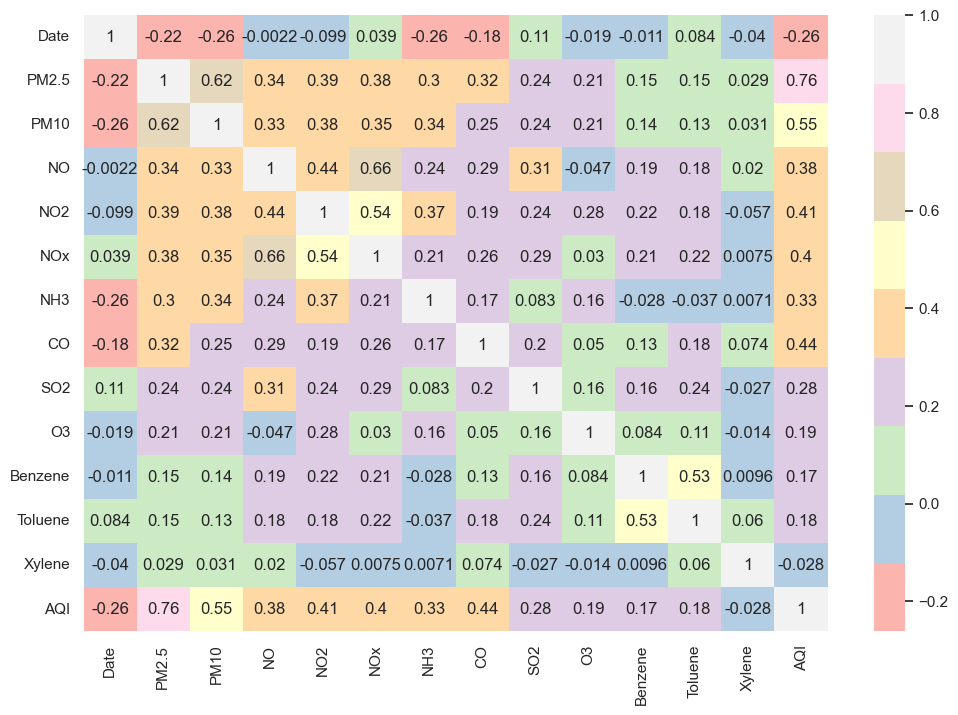

In [151]:
# Multivariate analysis - HEATMAP
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(),annot=True, cmap='Pastel1')
plt.show()